In [3]:
from google.colab import drive
import json
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd

drive.mount('/content/drive')


with open('/content/drive/MyDrive/teamSum.json', 'r') as file:
    data = json.load(file)


# Create a DataFrame from the JSON data
df = pd.DataFrame(data)

# Extract the features (X) and target variable (y)
X = df.drop('win', axis=1)  # Features
X = X.drop('_id', axis=1)  # Features
X = X.drop('matchId', axis=1)  # Features

y = df['win']  # Target variable


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
print(X[0:])
print(y[0:])

       allInPings  assists  champExperience  deaths  goldEarned  kills  \
0               0       60            31298      23       42734     33   
1               0       66            48341      42       58291     45   
2               0       37            42305      16       47321     50   
3               0       45            95256      31       77083     48   
4               0        0              796       0        2787      0   
...           ...      ...              ...     ...         ...    ...   
19122           0       33            57963      47       62311     40   
19123           1        8            31491      20       27093     11   
19124           0       42            66876      15       62604     38   
19125           0       14            56239      36       47690     20   
19126           0       27            43110      21       44430     38   

       visionScore  visionWardsBoughtInGame  
0                8                        0  
1                4 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9244641923680084


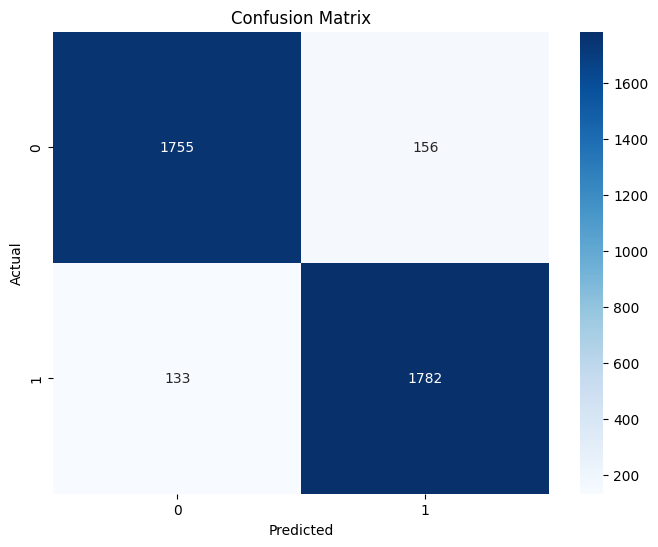

              precision    recall  f1-score   support

       False       0.93      0.92      0.92      1911
        True       0.92      0.93      0.92      1915

    accuracy                           0.92      3826
   macro avg       0.92      0.92      0.92      3826
weighted avg       0.92      0.92      0.92      3826



In [6]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

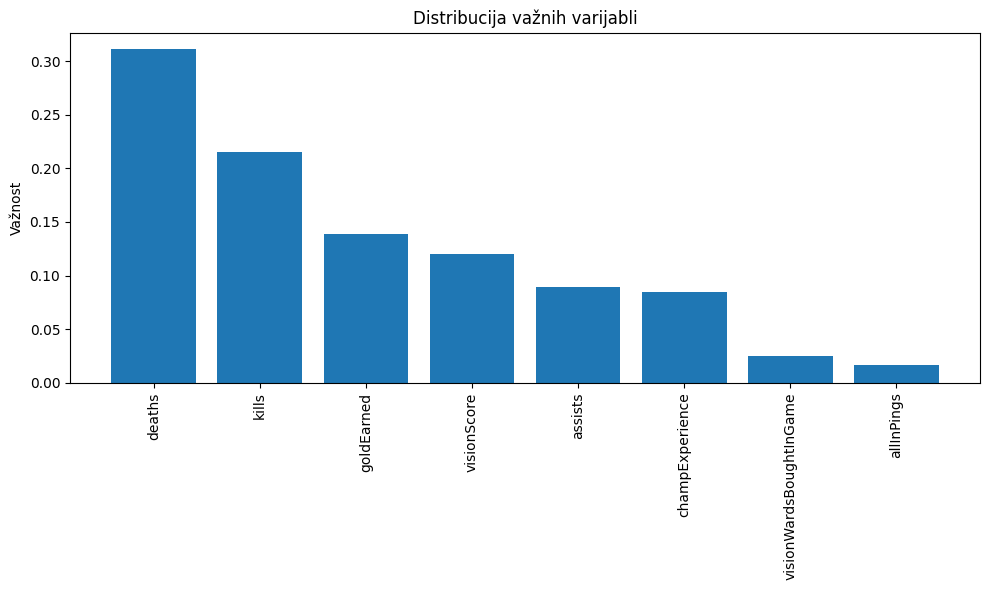

In [7]:
importances = rf_classifier.feature_importances_

feature_names = X.columns

indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_feature_names = feature_names[indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.ylabel('Važnost')
plt.title('Distribucija važnih varijabli')
plt.tight_layout()
plt.show()


In [8]:
from sklearn.metrics import roc_auc_score
auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.9244578249054192
